### <label style="color:green"> PRACTICA FINAL MINERIA DE DATOS Y APRENDIZAJE MAQUINA </label>

##### Alumnos:
- <label style="color:green"> Alejandro Madrid </label>
- <label style="color:green"> Alejandro Garcia </label>

In [14]:
# Imports
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import time
#
from sklearn.datasets import fetch_lfw_people
from sklearn.model_selection import train_test_split
from sklearn.decomposition import PCA
from sklearn.manifold import MDS, Isomap, LocallyLinearEmbedding
from sklearn.preprocessing import MinMaxScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
#
import torch
import torchvision.models as models
import torchvision.transforms as transforms
import torch.nn as nn
import torch.optim as optim


In [17]:
# Cargamos los datos
lfw_people = fetch_lfw_people(min_faces_per_person=70, resize=0.4)
X = lfw_people.data
y = lfw_people.target
# Dividimos en entrenamiento-testeo
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=.3, random_state=42) # Cambiaremos el randomState posteriormente para comprobar que funciona bien aunque alteremos el split
# Normalizamos los datos
scaler = MinMaxScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

array([5, 6, 3, ..., 5, 3, 5], dtype=int64)

In [18]:
# Ahora vamos a aplicar los m'etodos de reducci'on de la dimensionalidad
methods = {
    'PCA' :     PCA(n_components=2),
    'MDS' :     MDS(n_components=2),
    'ISOMAP':   Isomap(n_components=2),
    'LLE':      LocallyLinearEmbedding(n_components=2)
}
#
X_train_reduced = {}
X_test_reduced = {}
tiempo_ejecucion = {}
#
for name, method in methods.items():
        start_time = time.time()
        X_train_reduced[name] = method.fit_transform(X_train_scaled)
        X_test_reduced[name] = method.fit_transform(X_test_scaled)
        end_time = time.time()
        tiempo_ejecucion[name] = end_time - start_time
        

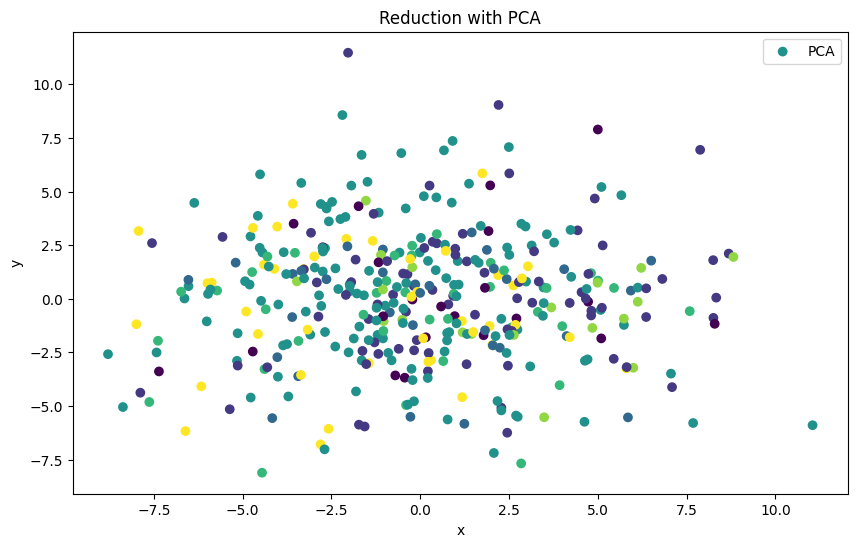

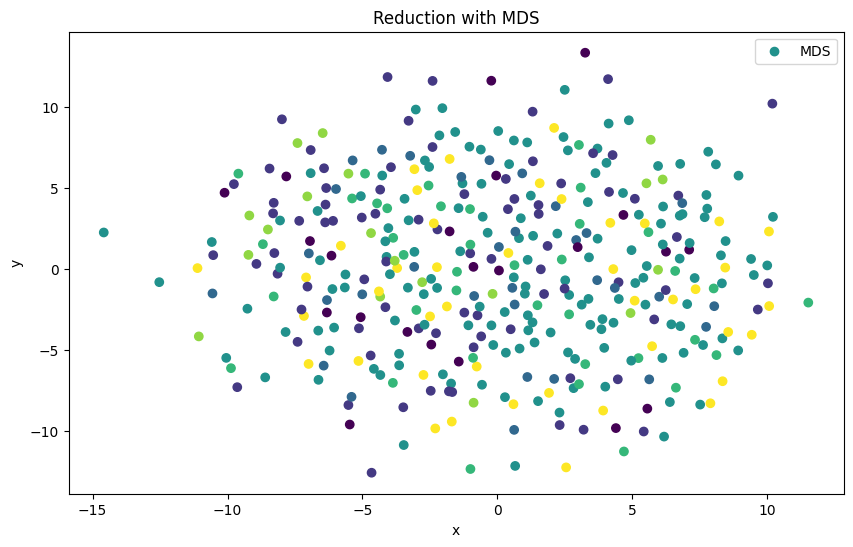

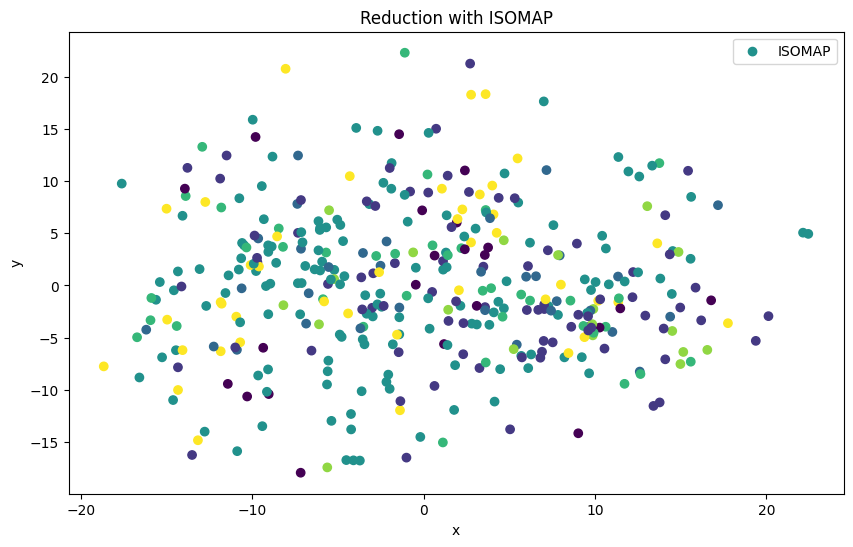

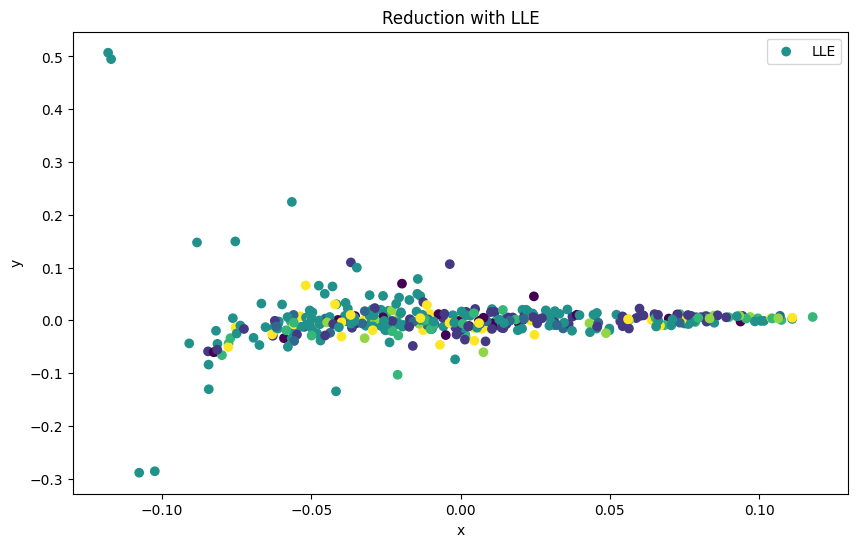

In [25]:
# Ahora graficamos los m'etodos de reducci'on 
for name, X_train_data in X_train_reduced.items():
    plt.figure(figsize=(10,6))
    plt.scatter(X_train_data[:,0], X_train_data[:,1], c=y_train, cmap='viridis', label=name)
    plt.title(f'Reduction with {name}')
    plt.xlabel('x')
    plt.ylabel('y')
    plt.legend()
    plt.show()